In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

Analisa kedua produk
1. Mana yang lebih unggul dari kedua produk ?
2. Dibulan apa saja setiap produk mengalami penurunan
3. Kapan mengalami peningkatan tertinggi dan terendah

In [3]:
data_jualan=pd.read_excel("data_penjualan-copy.xlsx")
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000.0,1800.0,1800000.0
1,05/08/2022,FoodpakMatte245,1000.0,1900.0,1900000.0
2,05/08/2022,CraftLaminasi290,5000.0,750.0,3750000.0
3,05/08/2022,CraftLaminasi290,1000.0,1200.0,1200000.0
4,07/08/2022,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000.0,900.0,900000.0
1072,15/11/2023,CraftLaminasi290,2000.0,800.0,1600000.0
1073,15/11/2023,CraftLaminasi290,1500.0,875.0,1312500.0
1074,15/11/2023,FoodpakMatte,1000.0,2200.0,2200000.0


In [5]:
data_jualan.isna().sum()

Tanggal          0
Jenis Produk    20
Jumlah Order    45
Harga           52
Total           54
dtype: int64

In [13]:
data_jualan["Jenis Produk"].fillna(data_jualan["Jenis Produk"].mode()[0], inplace=True)

C:\Users\gilan\AppData\Local\Temp\ipykernel_14616\3211667542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Jenis Produk"].fillna(data_jualan["Jenis Produk"].mode()[0], inplace=True)


In [15]:
data_jualan["Jumlah Order"].fillna(data_jualan["Jumlah Order"].mean(),inplace=True)

C:\Users\gilan\AppData\Local\Temp\ipykernel_14616\3158203600.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Jumlah Order"].fillna(data_jualan["Jumlah Order"].mean(),inplace=True)


In [19]:
data_jualan["Harga"].fillna(data_jualan["Harga"].mean(), inplace=True)

C:\Users\gilan\AppData\Local\Temp\ipykernel_14616\908935075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Harga"].fillna(data_jualan["Harga"].mean(), inplace=True)


In [17]:
data_jualan["Total"] = data_jualan["Total"].fillna(data_jualan["Jumlah Order"] * data_jualan["Harga"])

In [21]:
data_jualan.isna().sum

<bound method DataFrame.sum of       Tanggal  Jenis Produk  Jumlah Order  Harga  Total
0       False         False         False  False  False
1       False         False         False  False  False
2       False         False         False  False  False
3       False         False         False  False  False
4       False         False         False  False  False
...       ...           ...           ...    ...    ...
1071    False         False         False  False  False
1072    False         False         False  False  False
1073    False         False         False  False  False
1074    False         False         False  False  False
1075    False         False         False  False  False

[1076 rows x 5 columns]>

In [23]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tanggal       1076 non-null   object 
 1   Jenis Produk  1076 non-null   object 
 2   Jumlah Order  1076 non-null   float64
 3   Harga         1076 non-null   float64
 4   Total         1074 non-null   float64
dtypes: float64(3), object(2)
memory usage: 42.2+ KB


In [25]:
data_jualan["Jualan Produk"] = data_jualan["Jenis Produk"].astype(str)

In [27]:
data_jualan["Tanggal"] = pd.to_datetime(data_jualan["Tanggal"],format="%d/%m/%Y") 

In [29]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tanggal        1076 non-null   datetime64[ns]
 1   Jenis Produk   1076 non-null   object        
 2   Jumlah Order   1076 non-null   float64       
 3   Harga          1076 non-null   float64       
 4   Total          1074 non-null   float64       
 5   Jualan Produk  1076 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 50.6+ KB


In [31]:
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Jualan Produk
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0,Foodpak260
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0,FoodpakMatte245
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0,CraftLaminasi290
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0,CraftLaminasi290
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,Dupleks310
...,...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0,Ivory230
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0,CraftLaminasi290
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0,CraftLaminasi290
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0,FoodpakMatte


In [37]:
filter_data1 = data_jualan.copy()

In [39]:
filter_data1 = filter_data1[filter_data1["Jenis Produk"]=="Dupleks350"]
filter_data1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Jualan Produk
9,2022-08-09,Dupleks350,500.0,1800.0,900000.0,Dupleks350
10,2022-08-09,Dupleks350,500.0,1800.0,900000.0,Dupleks350
14,2022-08-11,Dupleks350,500.0,1800.0,900000.0,Dupleks350
15,2022-08-11,Dupleks350,500.0,1800.0,900000.0,Dupleks350
32,2022-08-16,Dupleks350,2000.0,1975.0,3950000.0,Dupleks350
...,...,...,...,...,...,...
1059,2023-11-11,Dupleks350,1000.0,1700.0,1700000.0,Dupleks350
1060,2023-11-11,Dupleks350,3500.0,2000.0,7000000.0,Dupleks350
1061,2023-11-11,Dupleks350,3500.0,1900.0,6650000.0,Dupleks350
1062,2023-11-11,Dupleks350,3000.0,1600.0,4800000.0,Dupleks350


In [41]:
filter_data1["Bulan"] = filter_data1["Tanggal"].dt.month_name()
filter_data1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Jualan Produk,Bulan
9,2022-08-09,Dupleks350,500.0,1800.0,900000.0,Dupleks350,August
10,2022-08-09,Dupleks350,500.0,1800.0,900000.0,Dupleks350,August
14,2022-08-11,Dupleks350,500.0,1800.0,900000.0,Dupleks350,August
15,2022-08-11,Dupleks350,500.0,1800.0,900000.0,Dupleks350,August
32,2022-08-16,Dupleks350,2000.0,1975.0,3950000.0,Dupleks350,August
...,...,...,...,...,...,...,...
1059,2023-11-11,Dupleks350,1000.0,1700.0,1700000.0,Dupleks350,November
1060,2023-11-11,Dupleks350,3500.0,2000.0,7000000.0,Dupleks350,November
1061,2023-11-11,Dupleks350,3500.0,1900.0,6650000.0,Dupleks350,November
1062,2023-11-11,Dupleks350,3000.0,1600.0,4800000.0,Dupleks350,November


In [43]:
penghasilan2_periode_data1 = filter_data1.groupby("Bulan").agg(
total_order = ("Jumlah Order","sum"),
total_pendapatan = ("Total","sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [45]:
penghasilan2_periode_data1

,total_order,total_pendapatan
Bulan,,
January,7000.000000,17050000.0
February,1000.000000,2500000.0
March,7000.000000,12150000.0
April,1000.000000,2250000.0
May,8915.332687,19750000.0
June,2000.000000,3200000.0
July,12000.000000,22000000.0
August,12000.000000,22100000.0
September,18915.332687,40575000.0


In [47]:
filter_data1["Tahun"] = filter_data1["Tanggal"].dt.year
filter_data1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Jualan Produk,Bulan,Tahun
9,2022-08-09,Dupleks350,500.0,1800.0,900000.0,Dupleks350,August,2022
10,2022-08-09,Dupleks350,500.0,1800.0,900000.0,Dupleks350,August,2022
14,2022-08-11,Dupleks350,500.0,1800.0,900000.0,Dupleks350,August,2022
15,2022-08-11,Dupleks350,500.0,1800.0,900000.0,Dupleks350,August,2022
32,2022-08-16,Dupleks350,2000.0,1975.0,3950000.0,Dupleks350,August,2022
...,...,...,...,...,...,...,...,...
1059,2023-11-11,Dupleks350,1000.0,1700.0,1700000.0,Dupleks350,November,2023
1060,2023-11-11,Dupleks350,3500.0,2000.0,7000000.0,Dupleks350,November,2023
1061,2023-11-11,Dupleks350,3500.0,1900.0,6650000.0,Dupleks350,November,2023
1062,2023-11-11,Dupleks350,3000.0,1600.0,4800000.0,Dupleks350,November,2023


In [49]:
penghasilan2_periode_data1 = filter_data1.groupby("Bulan").agg(
total_order = ("Jumlah Order","sum"),
total_pendapatan = ("Total","sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [51]:
penghasilan2_periode_data1

,total_order,total_pendapatan
Bulan,,
January,7000.000000,17050000.0
February,1000.000000,2500000.0
March,7000.000000,12150000.0
April,1000.000000,2250000.0
May,8915.332687,19750000.0
June,2000.000000,3200000.0
July,12000.000000,22000000.0
August,12000.000000,22100000.0
September,18915.332687,40575000.0


In [61]:
penghasilan2_periode_data1_totalpertahun = penghasilan2_periode_data1["total_pendapatan"].sum()
penghasilan2_periode_data1_totalpertahun 

221975000.0

In [65]:
filter_data2 = data_jualan.copy()

In [69]:
filter_data2 = filter_data2[(filter_data2["Jenis Produk"]=="Dupleks310")]
filter_data2 

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Jualan Produk
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,Dupleks310
5,2022-08-08,Dupleks310,500.0,1900.0,950000.0,Dupleks310
11,2022-08-10,Dupleks310,500.0,1600.0,800000.0,Dupleks310
16,2022-08-11,Dupleks310,2000.0,1300.0,2600000.0,Dupleks310
19,2022-08-12,Dupleks310,1000.0,2200.0,2200000.0,Dupleks310
...,...,...,...,...,...,...
1024,2023-10-28,Dupleks310,1000.0,1700.0,1700000.0,Dupleks310
1037,2023-11-03,Dupleks310,2000.0,1600.0,3200000.0,Dupleks310
1054,2023-11-09,Dupleks310,1000.0,1500.0,1500000.0,Dupleks310
1057,2023-11-11,Dupleks310,1000.0,1900.0,1900000.0,Dupleks310


In [71]:
filter_data2["Bulan"] = filter_data2["Tanggal"].dt.month_name()
filter_data2

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Jualan Produk,Bulan
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,Dupleks310,August
5,2022-08-08,Dupleks310,500.0,1900.0,950000.0,Dupleks310,August
11,2022-08-10,Dupleks310,500.0,1600.0,800000.0,Dupleks310,August
16,2022-08-11,Dupleks310,2000.0,1300.0,2600000.0,Dupleks310,August
19,2022-08-12,Dupleks310,1000.0,2200.0,2200000.0,Dupleks310,August
...,...,...,...,...,...,...,...
1024,2023-10-28,Dupleks310,1000.0,1700.0,1700000.0,Dupleks310,October
1037,2023-11-03,Dupleks310,2000.0,1600.0,3200000.0,Dupleks310,November
1054,2023-11-09,Dupleks310,1000.0,1500.0,1500000.0,Dupleks310,November
1057,2023-11-11,Dupleks310,1000.0,1900.0,1900000.0,Dupleks310,November


In [73]:
filter_data2["Tahun"] = filter_data2["Tanggal"].dt.year
filter_data2

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Jualan Produk,Bulan,Tahun
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,Dupleks310,August,2022
5,2022-08-08,Dupleks310,500.0,1900.0,950000.0,Dupleks310,August,2022
11,2022-08-10,Dupleks310,500.0,1600.0,800000.0,Dupleks310,August,2022
16,2022-08-11,Dupleks310,2000.0,1300.0,2600000.0,Dupleks310,August,2022
19,2022-08-12,Dupleks310,1000.0,2200.0,2200000.0,Dupleks310,August,2022
...,...,...,...,...,...,...,...,...
1024,2023-10-28,Dupleks310,1000.0,1700.0,1700000.0,Dupleks310,October,2023
1037,2023-11-03,Dupleks310,2000.0,1600.0,3200000.0,Dupleks310,November,2023
1054,2023-11-09,Dupleks310,1000.0,1500.0,1500000.0,Dupleks310,November,2023
1057,2023-11-11,Dupleks310,1000.0,1900.0,1900000.0,Dupleks310,November,2023


In [75]:
penghasilan2_periode_data2 = filter_data2.groupby("Bulan").agg(
total_order = ("Jumlah Order","sum"),
total_pendapatan = ("Total","sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [77]:
penghasilan2_periode_data2

,total_order,total_pendapatan
Bulan,,
January,32500.000000,54100000.0
February,3915.332687,7500000.0
March,11500.000000,19500000.0
April,10500.000000,17900000.0
May,12000.000000,17900000.0
June,13000.000000,19900000.0
July,18915.332687,32900000.0
August,59076.663434,104845000.0
September,42415.332687,65125000.0


In [79]:
penghasilan2_periode_data2_totalpertahun = penghasilan2_periode_data2["total_pendapatan"].sum()
penghasilan2_periode_data2_totalpertahun 

436865000.0

In [ ]:
# NO. 1
Dari produk Dupleks350 dan Dupleks310 yang lebih unggul dalam penjualan adalah dupleks 310 Dengan total pendapatan Rp. 436.865.000.0

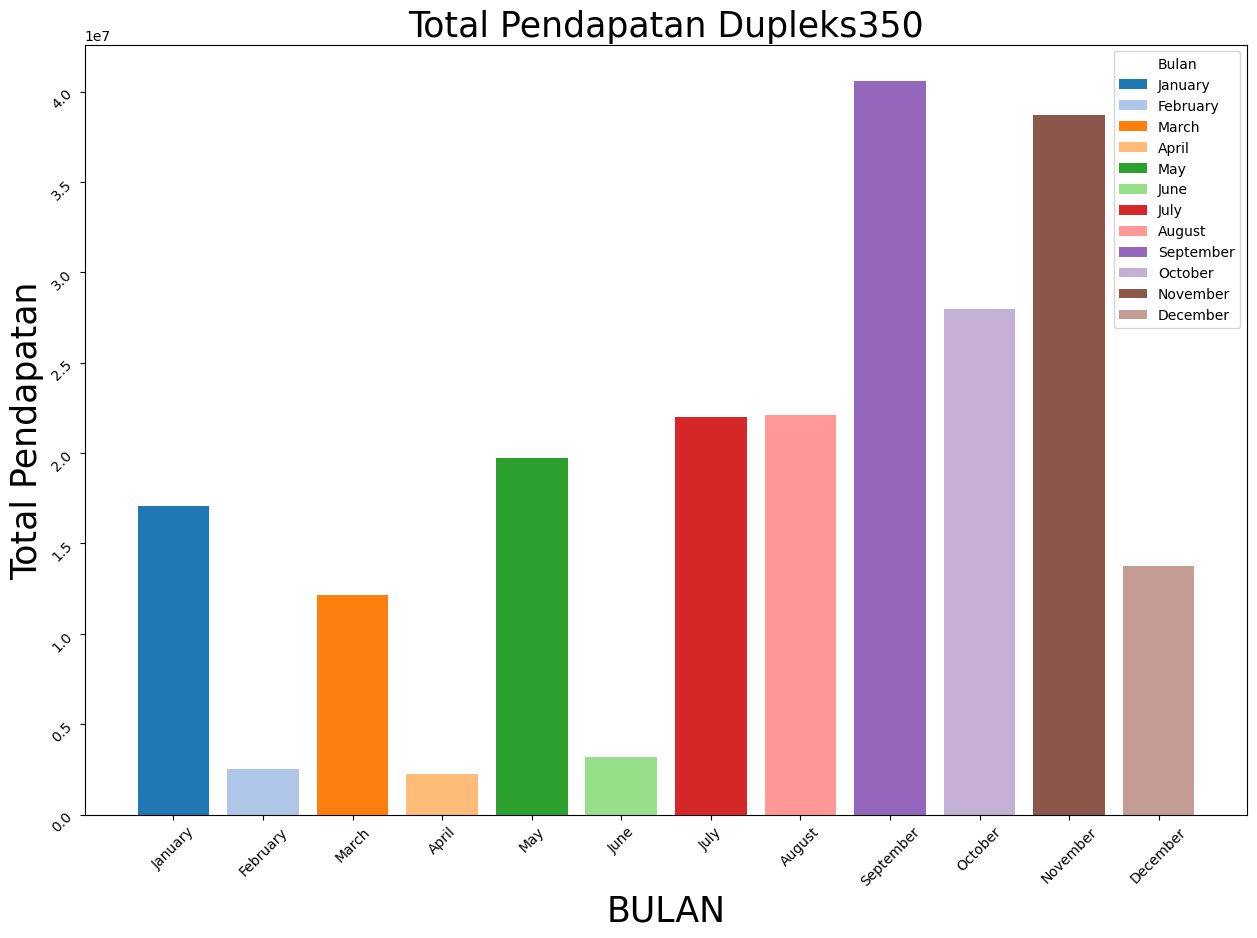

In [121]:
#membuat canvas
plt.figure(figsize=(15,10))

#deklarasi colorrs untuk memberikan warna legenda lebih dari 1
colors = plt.cm.tab20.colors

#membuat barchart dengan masukan data x dan y, lalu memberikan label pada data serta menyeting warna setiap kkolom X
plt.bar(penghasilan2_periode_data1 .index, penghasilan2_periode_data1 ["total_pendapatan"], label=penghasilan2_periode_data1 .index, color=colors[:len(penghasilan2_periode_data1.index)])

#kasih title
plt.title("Total Pendapatan Dupleks350",fontsize=25)

#label untuk X dan Y
plt.xlabel("BULAN",fontsize=25)
plt.ylabel("Total Pendapatan",fontsize=25)

#kasih rotasi (opsional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

#aktifkan si legend
plt.legend(penghasilan2_periode_data1 .index,title="Bulan", loc="upper right")
#plt.grid(True)
plt.show()

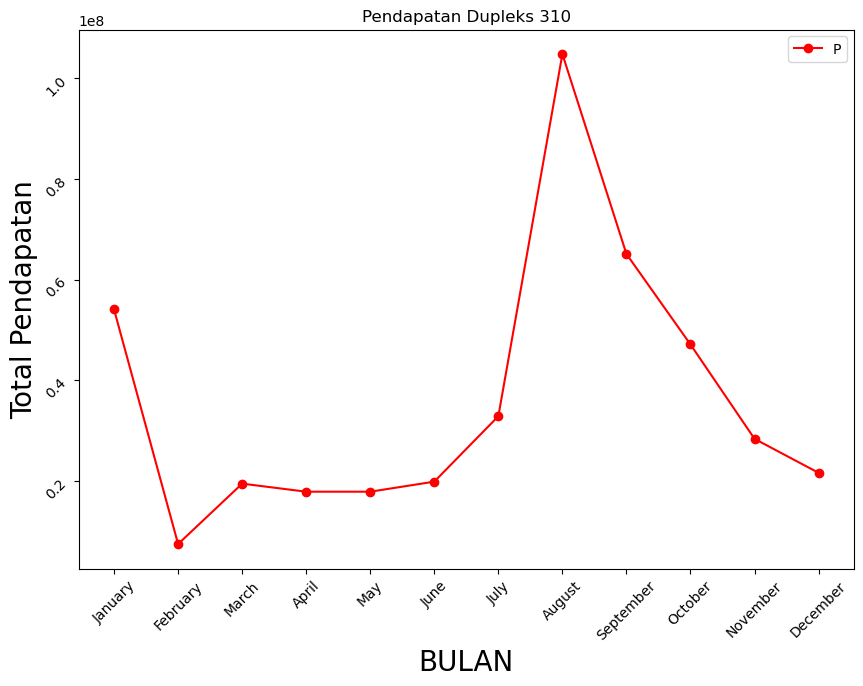

In [125]:
plt.figure(figsize=(10,7))
plt.title("Pendapatan Dupleks 310")
plt.plot(penghasilan2_periode_data2["total_pendapatan"],
         label="Total Pendapatan Dupleks310",
         marker="o",
         linestyle="-",
         color="red")
plt.xlabel("BULAN",fontsize=20)
plt.ylabel("Total Pendapatan",fontsize=20)

#kasih rotasi (opsional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.legend("Pendapatan Dupleks310")

plt.show()

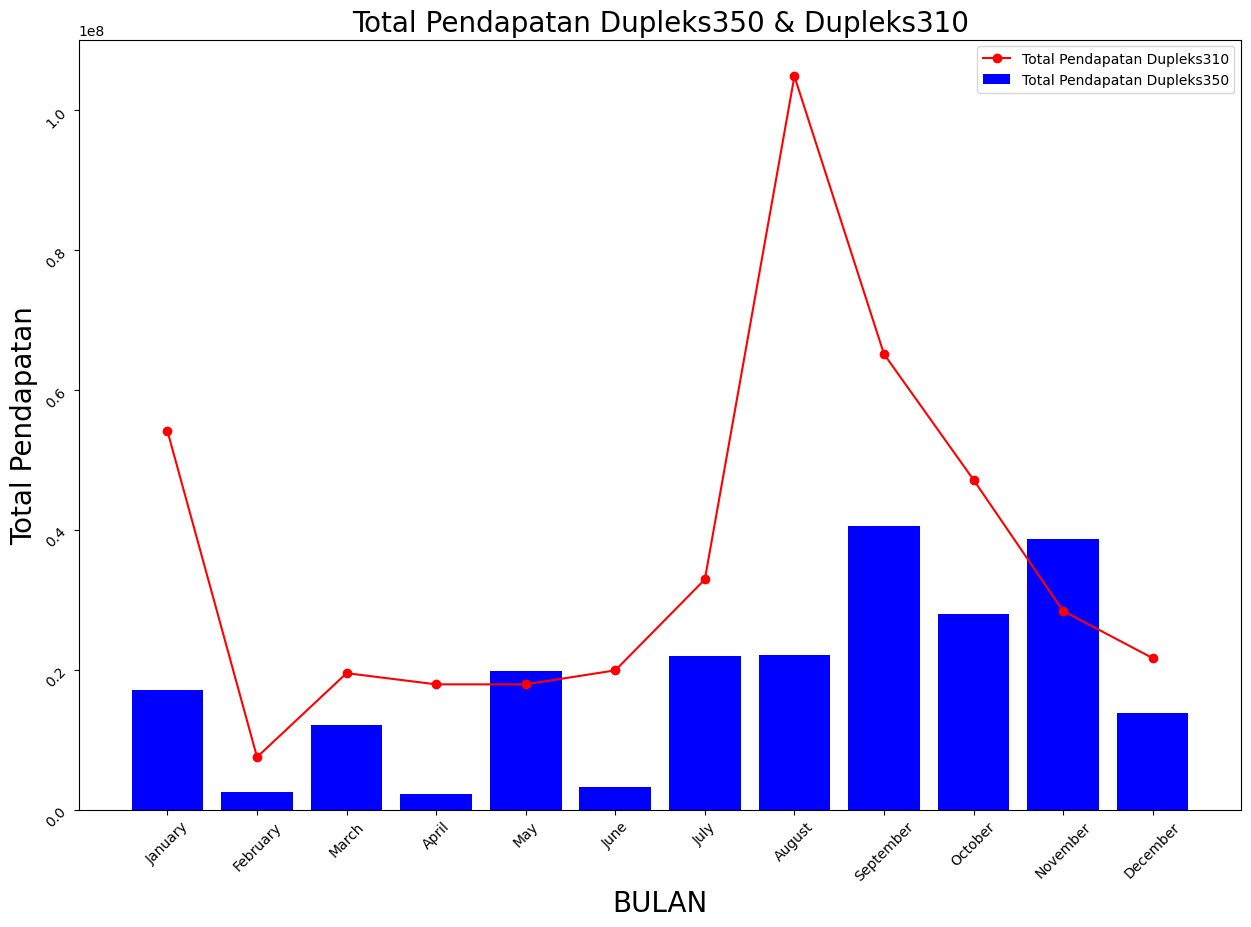

In [157]:
#membuat canvas
plt.figure(figsize=(15,10))

plt.bar(penghasilan2_periode_data1 .index, penghasilan2_periode_data1 ["total_pendapatan"], label="Total Pendapatan Dupleks350", color="blue")



plt.plot(penghasilan2_periode_data2["total_pendapatan"],
         label="Total Pendapatan Dupleks310",
         marker="o",
         linestyle="-",
         color="red")

plt.xlabel("BULAN",fontsize=20)
plt.ylabel("Total Pendapatan",fontsize=20)
#kasih title
plt.title("Total Pendapatan Dupleks350 & Dupleks310",fontsize=20)

#kasih rotasi (opsional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

#aktifkan si legend
plt.legend()
#plt.grid(True)
plt.show()

#2
Dibulan apa saja setiap produk mengalami penurunan ?
a. Penurunan pendapatan Dupleks350 : Februari,April,Juni,Oktober dan desember 
b. Penurunan pendapatan Dupleks310 : Februari,April,september,oktober,November,desember


In [ ]:
#3
Kapan mengalami peningkatan tertinggi dan terendah ?
a. Dupleks 350 : Peningkatan tertinggi = September , Peningkatan Terendah = Maret
b. Dupleks 310 : Peningkatan tertinggi = Agustus , Peningkatan Terendah = Juni

In [ ]:
#4
Pada bulan apa promosi diskon dupleks bisa digunakan untuk mendongkrak pendapatan ? 
Promosi diskon dapat diterapkan pada bulan januari- februari karena pada bulan tersebuat jenis dupleks mengalami penurunan drastis. 

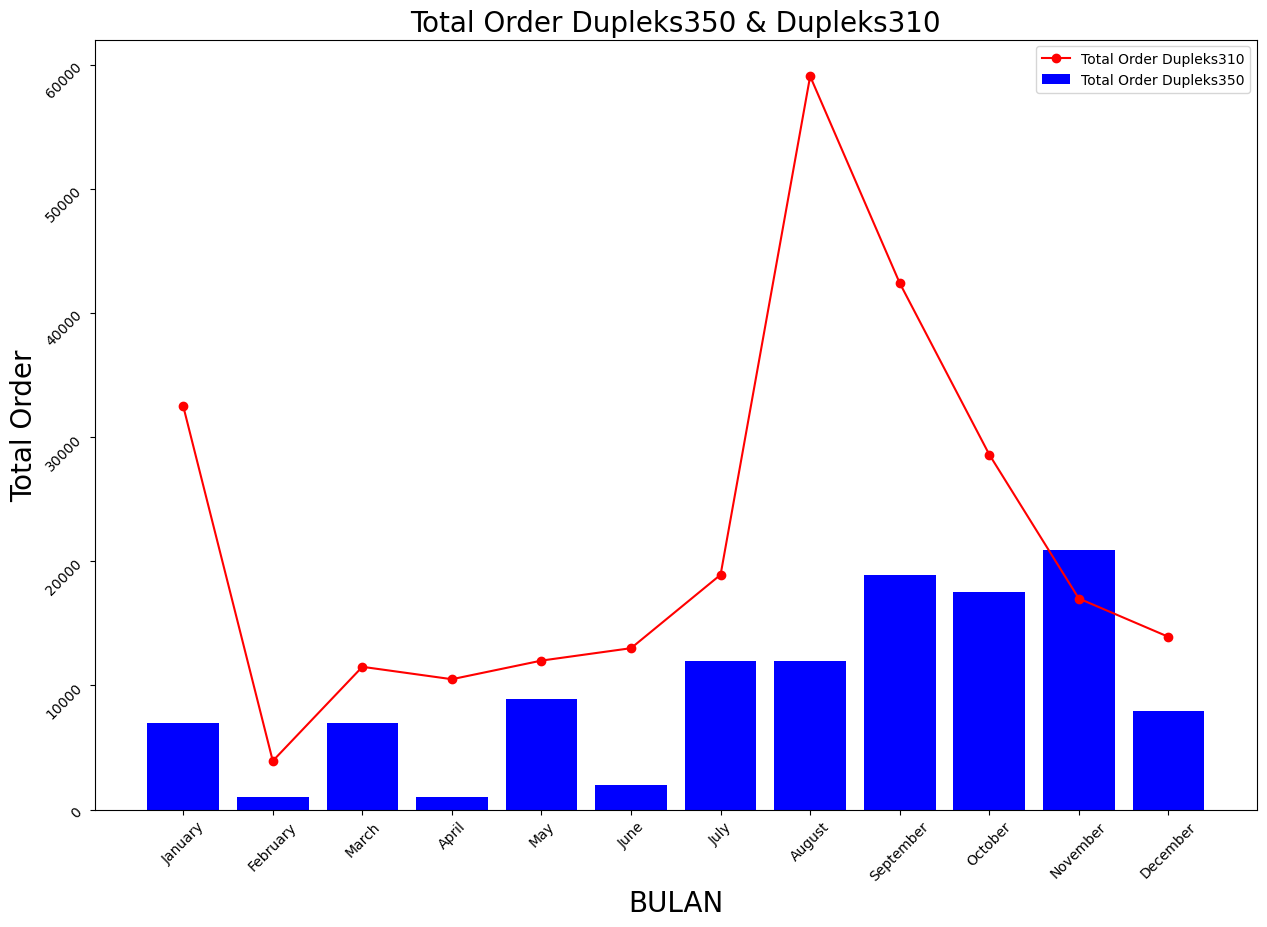

In [163]:
#membuat canvas
plt.figure(figsize=(15,10))

plt.bar(penghasilan2_periode_data1 .index, penghasilan2_periode_data1 ["total_order"], label="Total Order Dupleks350", color="blue")



plt.plot(penghasilan2_periode_data2["total_order"],
         label="Total Order Dupleks310",
         marker="o",
         linestyle="-",
         color="red")

plt.xlabel("BULAN",fontsize=20)
plt.ylabel("Total Order",fontsize=20)
#kasih title
plt.title("Total Order Dupleks350 & Dupleks310",fontsize=20)

#kasih rotasi (opsional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

#aktifkan si legend
plt.legend()
#plt.grid(True)
plt.show()

In [ ]:
#5
Setelah melakukan riset dengan berbagai macam faktor, Saat kapan dapat dipertinmbangkan untuk melakukan kenaikan harga dupleks ? 
Dapat dipertimbangkan pada bulan september, karena pada bulan tersebut merupakan peningkatan order tinggi untuk dua jenis dupleks tersebut. 